In [6]:
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")

import cpt_optimisation
from utils import get_community_project_costs
from model_alternate import simulation

In [3]:
folders = [x for x in os.listdir("DATA/") if "DS_" not in x and "sh" not in x]
folders = sorted(folders, key=lambda x: int(x.split("_")[-1]))
num_agents = 1225

In [4]:
AP = []
SR = []

for seed_folder in folders:

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/{seed_folder}")
    files = sorted(files, key=lambda x: int(x.split("_")[1]))
    
    for f in tqdm(files):        
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/{seed_folder}/{f}"))
        data_W = data["W"]

        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            AP.append(f)
        elif prop_richer < 1:
            SR.append(f)
        
        if len(AP) >= 30 and len(SR) >= 30:
            break

  0%|          | 0/7168 [00:00<?, ?it/s]

# All Poor Intervention

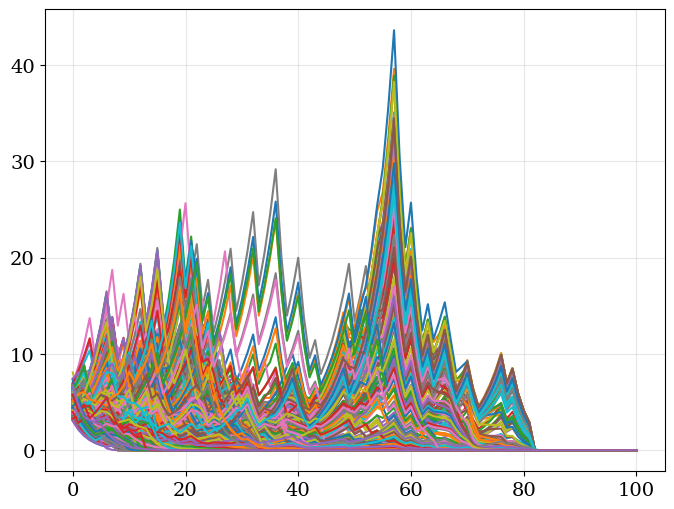

In [7]:
data = pickle.load(lzma.open(f"DATA/new_model_runs_paper_0/{AP[1]}"))
plt.plot(data["W"])
plt.show()

In [8]:
with open("sda_graphs/0_11.3212890625.pickle", "rb") as f:
    communities, community_membership, augmented_communities, initial_wealth = pickle.load(f)
row = data["params"]
project_costs = get_community_project_costs(initial_wealth, augmented_communities, row[0])

In [10]:
seed = 123

W, I, C, O, A, U, P, T = simulation (
    COMMUNITIES=communities,
    COMMUNITY_MEMBERSHIP=community_membership,
    SEED=seed,
    PROJECT_COSTS=project_costs,
    GAIN_RIGHT=row[1],
    SAVING_PROP=row[2],
    PROB_LEFT=row[3],
    INIT_WEALTH_VALUES=initial_wealth
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:18<00:00,  1.38s/it]


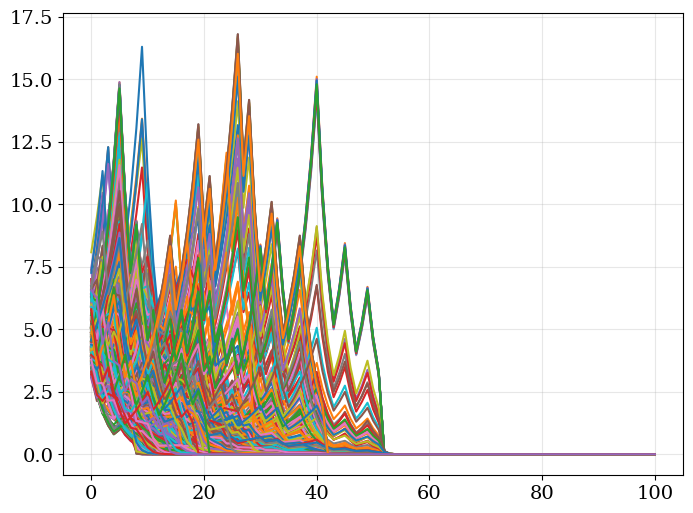

In [13]:
plt.plot(W)
plt.show()

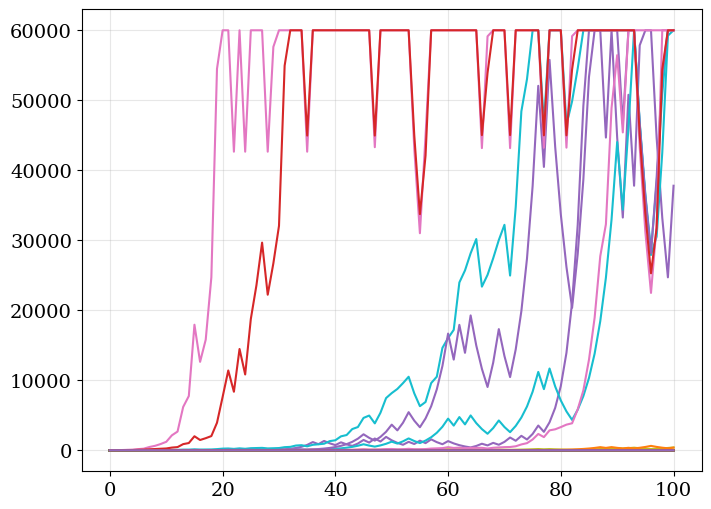

In [83]:
data = pickle.load(lzma.open(f"DATA/new_model_runs_paper_0/{SR[1]}"))
plt.plot(data["W"])
plt.show()